## Table of contents
***
- [Introduction](#introduction)
- [Part 1: Importing Libraries](#Importing_Libraries)
- [Part 2: Importing Dataset](#Importing_Dataset)
- [Part 3: Explore Dataset](#Explore_Dataset)
- [Part 4: Explore Target Variable](#target)
- [Part 5: Explore and Engineer Features](#features)
    - [5.1. Continues Variables](#continues)
    - [5.2. Categorical Variables](#cat)
- [Part 6: Modeling](#modeling)
    - [6.1. Split Dataset](#split)
    - [6.2. Choosing Optimal Model](#choise)
    - [6.3. Parameter Tuning for AdaBoost Classifier](#tuneA)
    - [6.4. Parameter Tuning for Gradient Boosting Classifier](#tuneB)
    - [6.5. Logistic Regression](#knn)
    - [6.6. Random Forest](#forest)
    - [6.7. Comparison of Classifiers](#compare)
- [Part 7: Preprocessing of Test Data](#test)
- [Part 8: Prediction and Submission](#pred)

# Introduction
<a id="introduction"></a>

In this project, I will apply supervised learning techniques and an analytical mind on data collected for the U.S. census to help CharityML (a fictitious charity organization) identify people most likely to donate to their cause. I will first explore the data to learn how the census data is recorded. Next, I will apply a series of transformations and preprocessing techniques to manipulate the data into a workable format. I will then evaluate several supervised learners of your choice on the data, and consider which is best suited for the solution. Afterwards, I will optimize the model selected and present it as a solution to CharityML. Finally, you will explore the chosen model and its predictions under the hood, to see just how well it's performing when considering the data it's given.

The success of your model will be determined based on models AUC or area under the curve associated with ROC curves. 

# Part 1: Importing Libraries
<a id="Importing_Libraries"></a>

In [2]:
# import useful libraries
import numpy as np #
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from time import time
from sklearn.metrics import roc_auc_score


# Import the supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#disable warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Part 2: Importing Dataset
<a id="Importing_Dataset"></a>

In [3]:
data_train = pd.read_csv("census.csv")
data_test = pd.read_csv("test_census.csv").drop('Unnamed: 0',1)
#make a copy of data_train to overwrite during feature engineering
train = data_train[:]

# Part 3: Explore Dataset
<a id="Explore_Dataset"></a>

In [4]:
# train and test set shape
print("Train set shape:", train.shape)
print("Test set shape:", data_test.shape)

Train set shape: (45222, 14)
Test set shape: (45222, 13)


In [5]:
# first glance on train set
train.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
#first glance on test data
data_test.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [7]:
# Check info for train and test dataset
data_train.info()
print("----------------------------------")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
age                45205 non-null float64
workclass          45200 non-null object
education_level    45202 

according to the information on dataset, there are no missing values in train dataset, however, there are values missing in test data.

In [8]:
# Total number of records
n_records = train.shape[0]

# Print the results
print("Total number of records: {}".format(n_records))


Total number of records: 45222


# Part 4: Explore Target Variable
<a id="target"></a>

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. 

In [9]:
#explore unique values for income, to use it below 
data_train.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
# Number of records where individual's income is more than $50,000
n_greater_50k = train[train.income == '>50K' ].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = train[train.income == '<=50K' ].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k/n_records)*100 ,2)

# Print the results
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


Most of the algorithms can't work with categorical strings and transformation of string categories into numeric values is required. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as 0 and 1

In [11]:
# transform target into new variable called income:
income=data_train.income.map({'<=50K': 0, '>50K':1})
income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

# Part 5: Explore and Engineer Features
<a id="features"></a>

Before proceeding to modeling stage it is very important to explore and preprocess features. Proper feature engineering can improve model performance significantly.

In [13]:
# check how many unique values each feature has:
for column in train.columns:
    print(column, len(train[column].unique()))

age 74
workclass 7
education_level 16
education-num 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
capital-gain 121
capital-loss 97
hours-per-week 96
native-country 41
income 2


Age, capital_gain, capital_loss, hours_per_week and education_num are continues features, rest are categorical. 

In [14]:
categorical = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 
               'race', 'sex', 'native-country']
continues = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

In [15]:
# for each categorical features pring unique values:
for column in categorical:
    print(column, train[column].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education_level [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Ri

#### Summary 
* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## 5.1. Continues Variables
<a id="continues"></a>

A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized.  

We will perform three steps to preprocess continues data:
    - check skew of data and perform log transform on skewed variables
    - find outliers
    - normalize data

### Transforming Skewed Continuous Features

Skew for  age 0.5328158942555792
Skew for  capital-gain 11.789002180291192
Skew for  capital-loss 4.516304152981587
Skew for  hours-per-week 0.34054514378520867
Skew for  education-num -0.3106209464770189


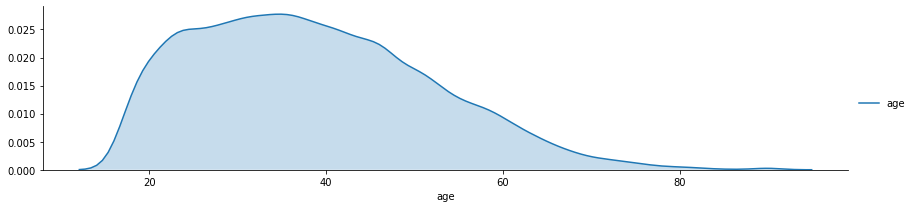

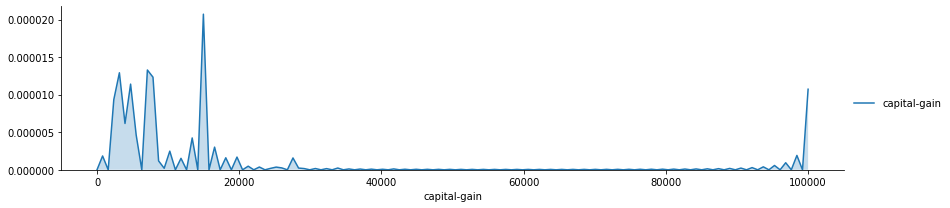

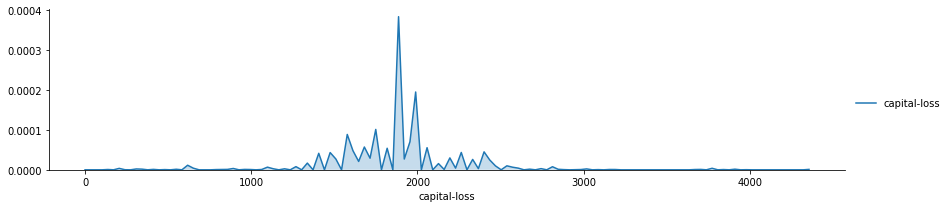

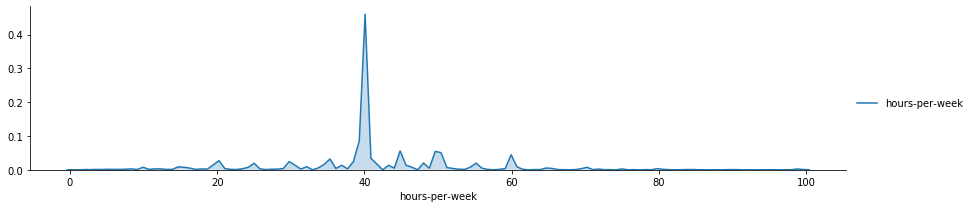

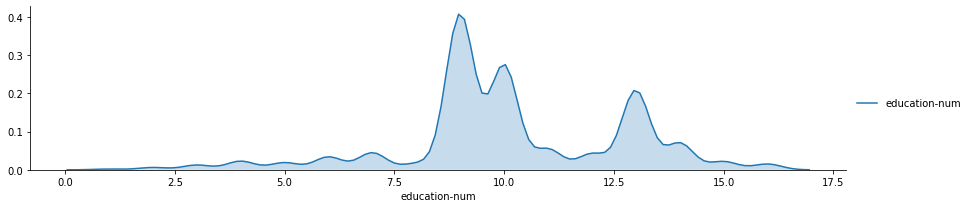

In [17]:
# plot disctribution and check skewness:
for column in continues:
    a = sns.FacetGrid(train, aspect=4 )
    a.map(sns.kdeplot, column, shade= True )
    a.add_legend()
    print('Skew for ',str(column), train[column].skew())

From claculated skew and plots it can be stated that capital-gain and capital-loss features are highly skewed. For highly-skewed feature distributions, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation, however: the logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Skew for  capital-gain 3.082385920215176
Skew for  capital-loss 4.271194769830899


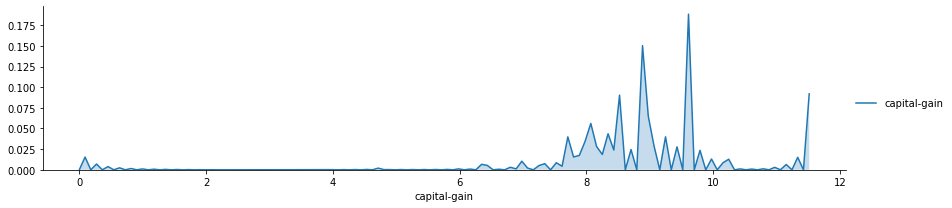

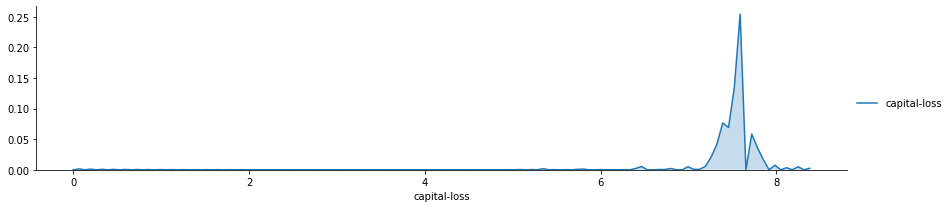

In [18]:
skewed = ['capital-gain', 'capital-loss']
# Log-transform the skewed features (create function to use later for test set)
def log_transform(data):
    return data[skewed].apply(lambda x: np.log(x + 1))
    
train[skewed] = log_transform(train)

# Visualize the new log distributions
for column in skewed:
    a = sns.FacetGrid(train, aspect=4 )
    a.map(sns.kdeplot, column, shade= True )
    a.add_legend()
    print('Skew for ',str(column), train[column].skew())

Applying log transformation on capital-gain and capital-loss helped to reduce skew, however, skew is still pretty high for this two features. 

### Find outliers

Outliers can shift decision boundry for linear models significanlty, thats why is it inportant to handle them. Tree models are not sensitive for ourliers, but shifting outliers will not effect them in any way, so we will perform shifting for all models.  
In order to check for outliers we will make box plots for continues features.

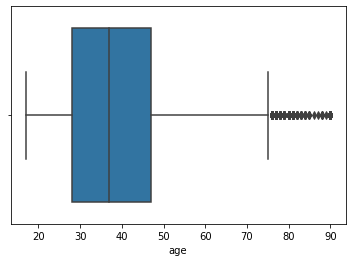

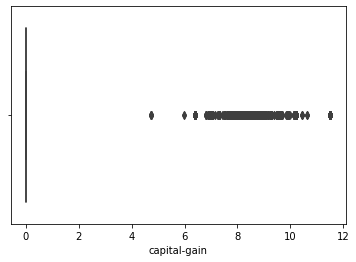

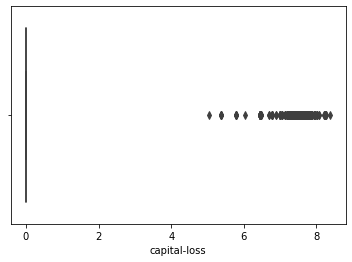

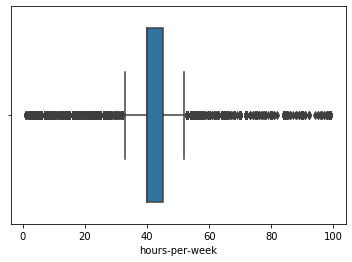

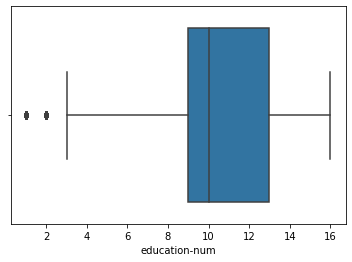

In [19]:
for column in continues:
    sns.boxplot(train[column])
    plt.show()

From the graphs it can be seen that all continues features have outliers. Outliers can be a problem for linear model performance. I will leave this outliers without preprocessing them, as they do not effect tree based models. 

### Normalizing Numerical Features
Normalizing numerical features is important for a lot of algorithms. Proper feature scaling can help gradient descent to converge faster. Moreover, algorithms that are using eucledian disctance (such as K-meand and KNN) and regression coefficients of linear models  are effected by scaling.  
Applying scaling to the data does not change the shape of each feature's distribution, however, normalization ensures that each feature is treated equally when applying supervised learners.  
There are multiple ways to scale features: like MinMaxScaler, StandardScaler, RobustScaler and etc.  
We will use [`MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn

In [20]:
from sklearn.preprocessing import MinMaxScaler
#normalizing numerical features. Create function to use later on test data

def normalize(data):
    
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data[continues])
    return data

train[continues]= normalize(train)
train.head(100)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.041096,Private,Some-college,0.600000,Never-married,Tech-support,Own-child,White,Female,0.000000,0.0,0.397959,United-States,<=50K
96,0.164384,Private,HS-grad,0.533333,Never-married,Craft-repair,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
97,0.205479,Self-emp-inc,HS-grad,0.533333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.777174,0.0,0.397959,United-States,>50K
98,0.178082,Private,11th,0.400000,Never-married,Handlers-cleaners,Own-child,White,Male,0.000000,0.0,0.397959,United-States,<=50K


## 5.1. Categorical Variables
<a id="cat"></a>


Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted.  

There are multiple ways to perform encoding:

1. One-hot encoding:  
keeps all information about variable, but create a lot of new features  

2. Binary encoding:  
keeps all information about variable, creates new dimensions, but less than one-hot encoder        
             
3. Ordinal numbering encoding:    
keeps semantical info about variable, but treats 2-1 as 3-2 and can be missleading, doesn't create new dimensions  

4. Frequency encoding:  
doesn't create new dimensions, but depends on frequency rather than relation with target and that can lead to wrong predictions  

5. Target guided encoding: ordinal, mean, and probability ratio encoding, Weight of evidence:  
creates monotonic relationship between variable and target, but can cause overfitting 

All of this models have advantages and disadvantagies, and performance of particular encoding strategy for categorical features depends on amount of instances and features in data set, variable type and chosen prediction model. 

According to the info about unique values for categorical variables in current dataset, there are not so many unique values for each feature. Therefore we will use one-hot encoding strategy, where all categories of variables are converted into separate features. 

In [21]:
# One-hot encode thedata using pandas.get_dummies()
features_final = pd.get_dummies(train.drop(['income'],1))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))


103 total features after one-hot encoding.


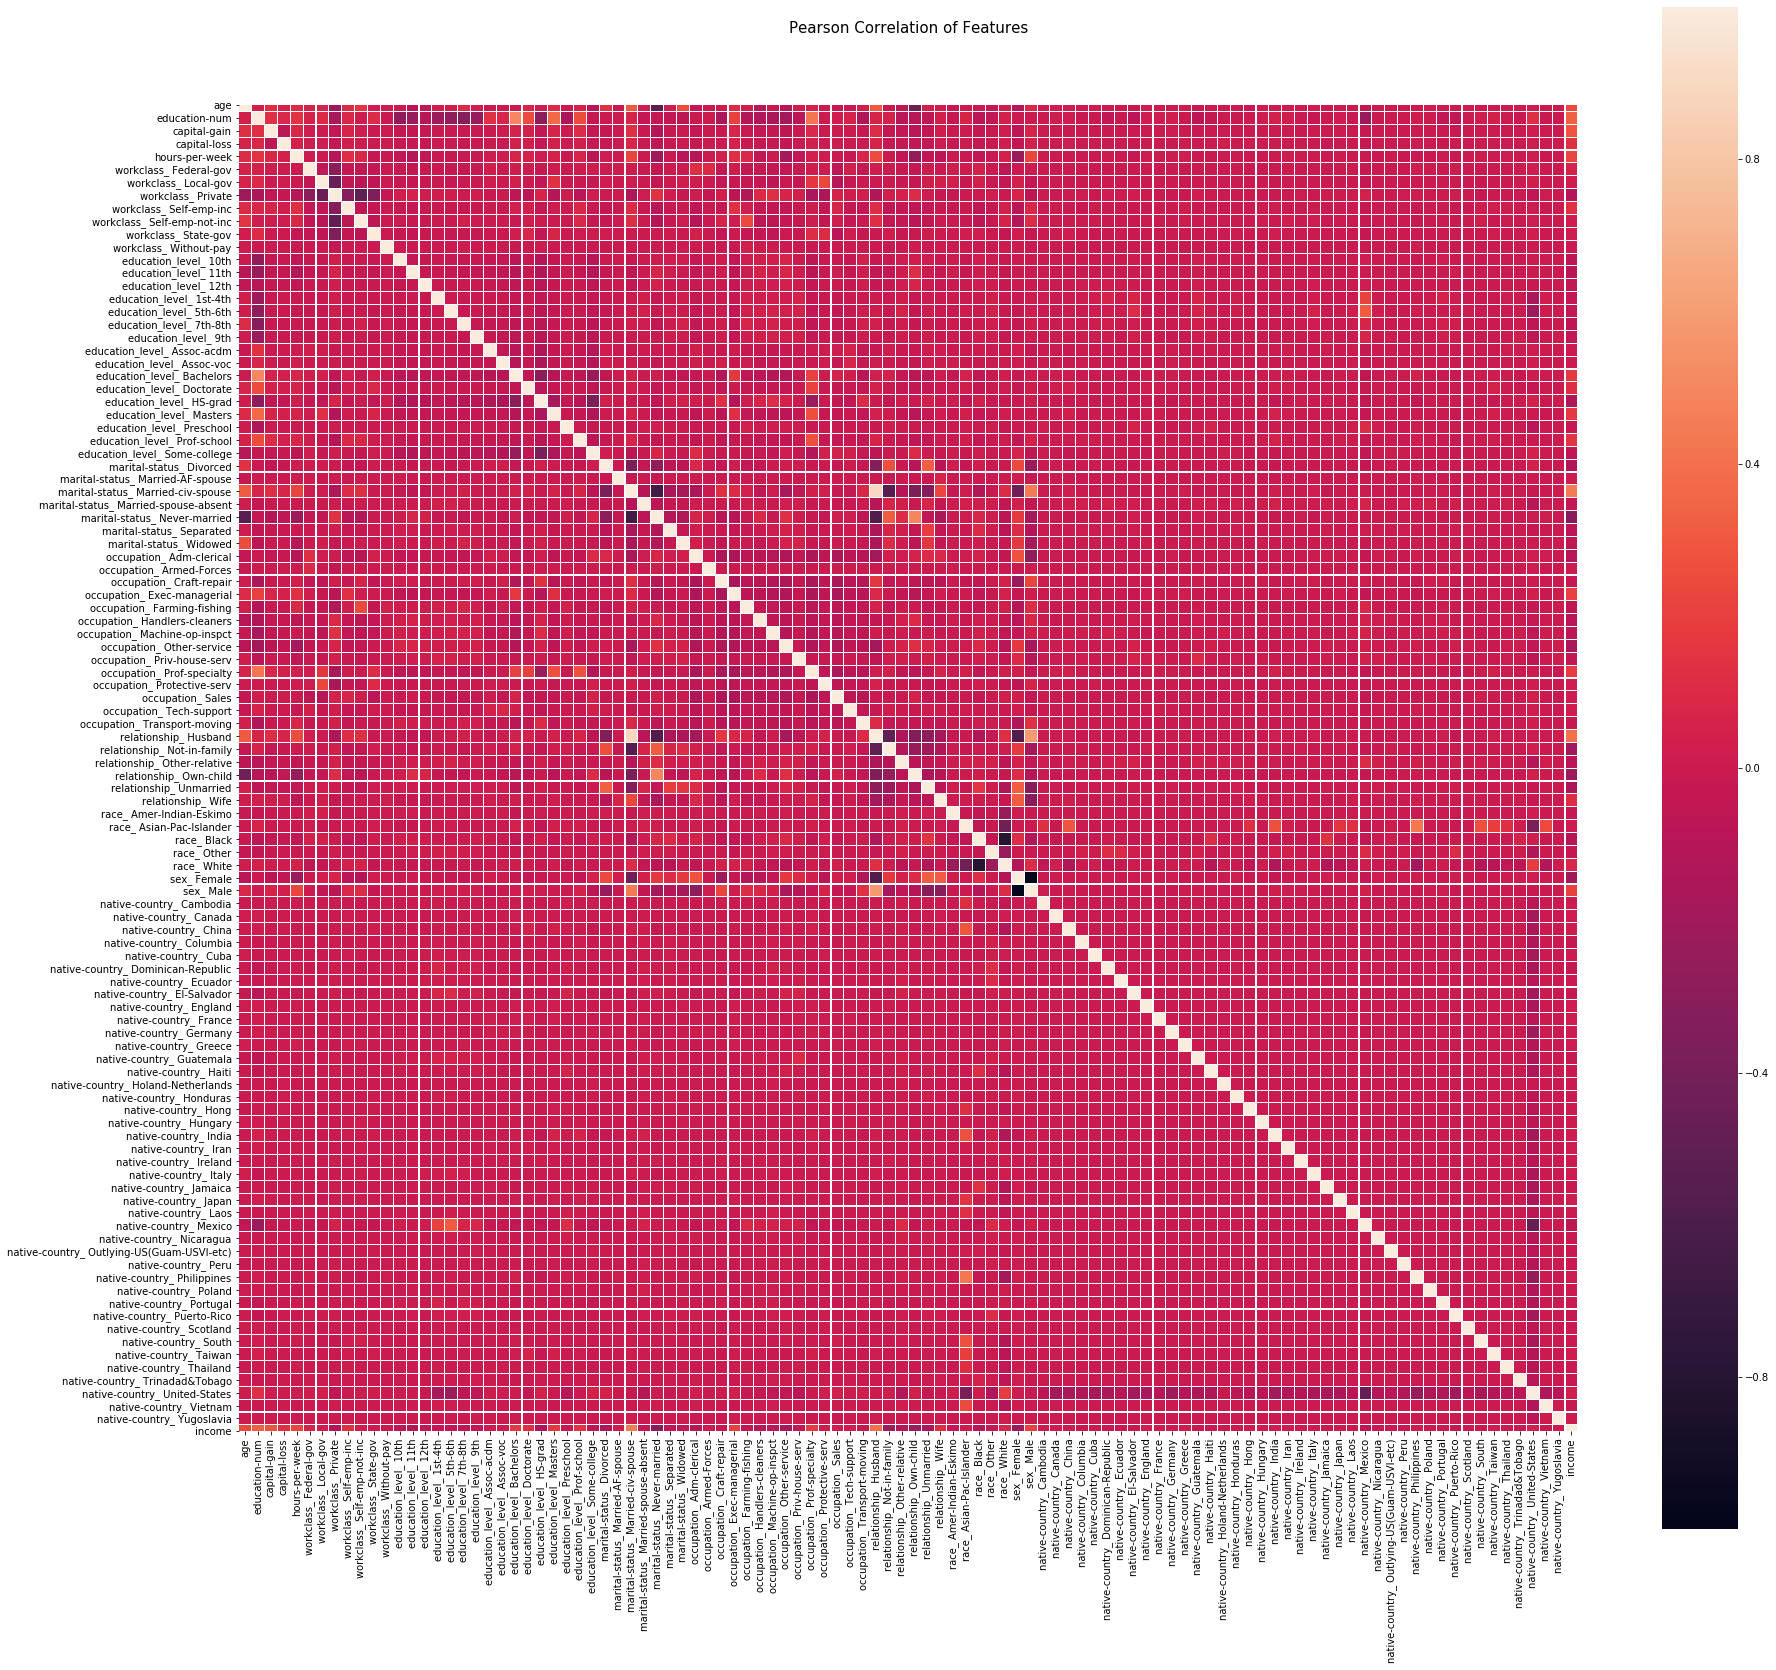

In [22]:
# check correlation between features: 
data = pd.concat([features_final, income], axis =1)
plt.figure(figsize=(30,28))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white')

#### Information discovered about dataset:
- dataset size: (45222, 103)
- feature correlation - mostly low --> low linear relation between variables
- income is unballanced, however, not so much, enough data for both classes
- most of the features have low correlation with target, but around 10% of features have more than 0.4 correlation with target
- continues features have outliers - negative effect on linear models performance

# Part 6: Modeling
<a id="Importing_Libraries"></a>

In this chaper, we will investigate six different algorithms that are suitable for Charity ML prediction, and determine which 3 are the best at modeling the data. Four of these algorithms will be supervised learners of choice for further parameter tuning and prediction.

## 6.1. Split Dataset
<a id="split"></a>

Split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_val.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## 6.2. Choosing optimal model
<a id="choise"></a>

According to information discovered about dataset:

1. Hypothesis about computation complexity of models: 
    - Dataset is more than 10000 samples - too big to use SVC due to hight computation complexity of the model: O(n_samples^2 * n_features) for RBF kernel 
    - Random forest - low computation complexity (trees can be constracted in parallel)
    - KNN - very big computation complexity in test time (each test point needs to be compared with each point in training set to find nearest neighbor) 
    - Gradient Boost - computation complexity depends on n_estimators, as it is sequential model
    - Decision tree, logictic regression and Naive Bayes - low computation complexity 

    
2. Hypothesis about model performance:
    - Linear models - medium performance as there is not so much correlation in dataset 
    - Ensemble models are in general good performers, especially with optimal parameters
    - KNN - usually good performer
    - Decision tree - in general good performer, but has overfitting problem
    - Naive Bayes - low performance due to assumption for independence in data - not realistic in real world
    
According to all mentioned above, my assumption is that ensemble models will outperform all other models in performance and still provide feasible comptutation complexity.   
I will check 3 of them : AdaBoost, Random Forest, and Gradient Boosting.
However, I will also check 3 other models to confirm correctness of my assumptions: KNN, Logictic regression and Naive Bayes.
I will leave SVC out of scope due to very high computation complexity.

1. Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting): 
    - Pros: no overfitting; no need to worry about data linearity; runs efficiently on large datasets 
    - Cons: only predicts in range of data available in train set; doesn't train well on small datasets; training time can be huge as needs to train multiple trees, but possible to reduce running parallel processing 
    - Dataset is big enough to use ensemble; can deal with non-linear data; in general ensemble models are top performance models 
       
2. Logistic regression: 
    - Pros: simple to understand and explain model; fast to train; good to predict probability of events
    - Cons: Needs linear inputs --> extensive feature engineering; suffers from ourliers   
    - Performance will be lower as there is not so much correlation between variables in dataset  

3. K-Nearest Neighbors:
    - Pros: lazy training, good performance
    - Cons: slow in predicting phase, susceptible to high dimensional dataset    
    - Good relative performance, but will be slow in testing time. I would not use this algorithm in applications that need fast decision, but for this project this information is missing from initial conditions, so I decided to try this algorithm as well
    
3. Gaussian Naive Bayes (GaussianNB):
   - Pros: performs well with categorical variables; converges fast; good with moderate and large datasets
   - Cons: independence assumption- correlated features effect performance    
   - Can deal with medium and large datasets and is fast

To properly evaluate the performance of each model chosen, it's important that you create a training and predicting pipeline that allows to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 

In [26]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (18,10))

    # Constants
    bar_width = 1
    colors = ['r','g','b','c', 'm', 'y']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'roc_train',  'pred_time', 'roc_test']):

                ax[j//2, j%2].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("ROC-AUC Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("ROC-AUC Score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("ROC-AUC Score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("ROC-AUC Score on Testing Set")
       
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    ax[1, 0].legend(handles = patches)
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [27]:
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')


def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features testing set
       - y_val: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data 
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['roc_train'] = roc_auc_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['roc_test'] = roc_auc_score(y_val, predictions_test)
              
    # Return the results
    return results

In [28]:
random_state =42
n_estimators =100

# Initialize the three models
clf_A = GaussianNB()
clf_B = KNeighborsClassifier()
clf_C = LogisticRegression(random_state= random_state)
clf_D = RandomForestClassifier(random_state= random_state, n_estimators = n_estimators)
clf_E = GradientBoostingClassifier(n_estimators = n_estimators, random_state = random_state)
clf_F = AdaBoostClassifier(n_estimators = n_estimators, random_state = random_state)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train, y_train, X_val, y_val)

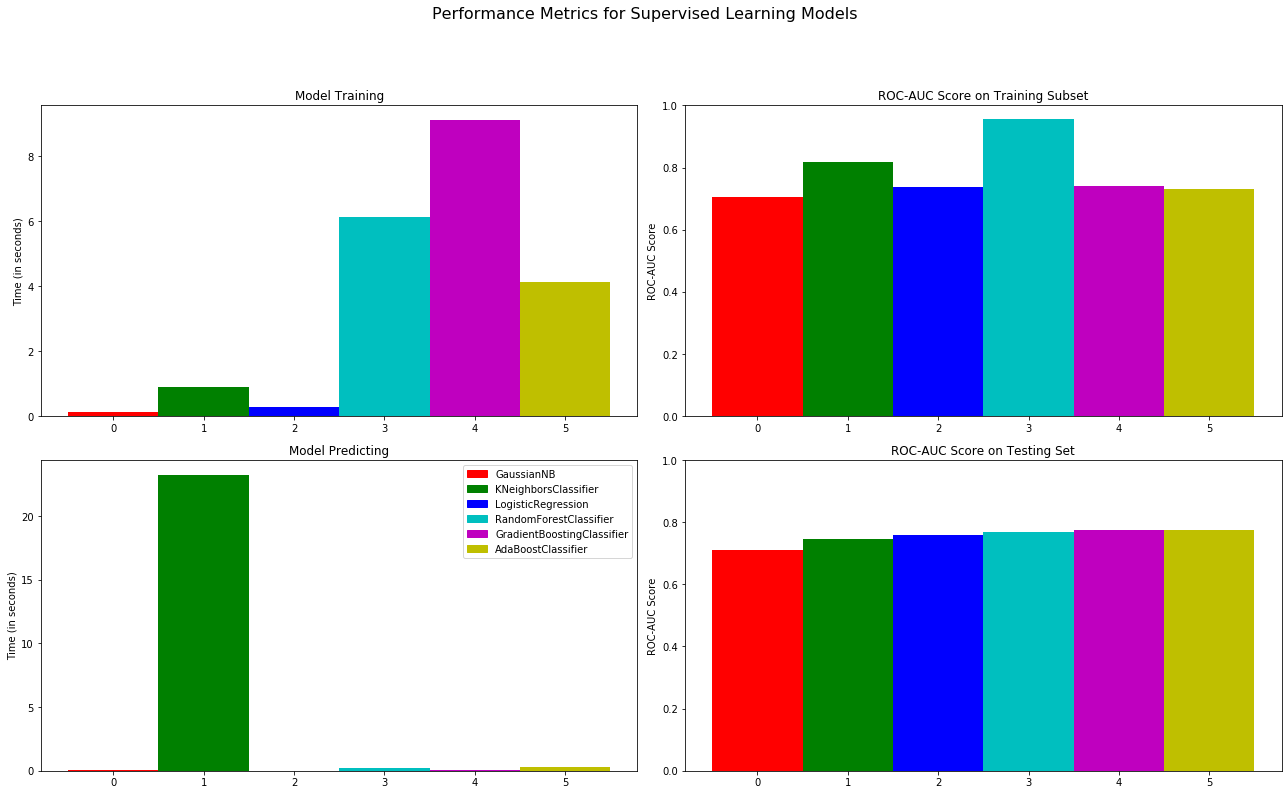

In [29]:
# Run metrics visualization for the three supervised learning models chosen
evaluate(results)

### Choosing Optimal Models: Summary

1. Metrics:   
    - As expected good predictors are ensemble models. All off them provide high F-score for training/test set. Random forest has lower F-score for test data, however, very high F-score for train data. This shows that default Random Forest Classier is overfitting training data. However, by choosing correct parameters, Random Forest model will have better balance between train/test data  

2. Comutation complexity:  
    - NaiveBayes, KNN, Logistic regression and Random Forest are the fastest models to train
    - KNN is very slow in prediction, other models are relatively fast 
    - From ensemble models that use default parameters Random forest is the fastest, as it can train multiple trees at the same time. Gradient boosting classifier seams to be the slowest, as trees are trained using cascaded approach. However, all mentined above is subjective information as computation complexity depends on model parameters. 
    
3. Suitability for the data:
    - dataset size: (45222, 103)
    - as correlation between features are relatively low and also ensemple models perform significantly better, I assume that non-linear relationships between features exsist in this dataset and they are important for correct prediction. The dataset is already 103 dimensions, so additional non-linear features will expand feature space tremendously and result in very high computational complexity.

Top 4 models based on performance: Gradient Boosting, Adaboost, random Forest and Logistic regression. 
Gradient Boosting Classifier  high training time, but still managable, low prediction time, and superior performance.  
Adaboost Classifier , has  lower training time, slightly bigger prediction time and superior performance. Moreover, Adaboost has less parameters than Gradient Boosting Classifier and is much easier to tune.  

## 6.3. Parameter Tuning for AdaBosst Classifier
<a id="tuneA"></a>

AdaBoost classifier doesn't have much parameters to tune, however, it is critical to find proper balance between n-estimators and learning rate. We will try to increase n-estimators and decrease learning rate slowly until we observe no further improvement in performance.

In [31]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer 
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = AdaBoostClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': range(20,1021,100)}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer,  verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


For learning rate = 1 (default parmeter for Adaboost) optimal n_estimators is 1020- that is on the edge of search parameters. I will increase n_estimators further

In [ ]:
clf = AdaBoostClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = { 'n_estimators': range(1000,1501,100)}

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer,  verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

![](http://)For learning rate = 1 (default parmeter for Adaboost) optimal n_estimators is 1200. In order to make model better I will try to further decrease learning rate by half and increase n_estimates a liitle bit more than twice

In [ ]:
clf = AdaBoostClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = { 'n_estimators': range(2000,3001,200),
              'learning_rate': [0.5]}

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer,  verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

Performance did not improve by decreasing learning rate and increasing n_estimators. I will use learning_rate of 1 and n_estimators of 1200

In [ ]:
clf = AdaBoostClassifier(n_estimators=4000,random_state = random_state, learning_rate = 0.5)
clf.fit(X_train, y_train)
best_predictions_val_ab = clf.predict(X_val)
best_predictions_train_ab = clf.predict(X_train)
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val_ab)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train_ab)))

In [ ]:
#fit model with optimal parameters found during gridsearch:
clf_AB = AdaBoostClassifier(n_estimators=1200,random_state = random_state)
clf_AB.fit(X_train, y_train)
# predict outcome using predict_probe instead of predict function:
probs_train_ab = clf_AB.predict_proba(X_train)[:, 1]
probs_val_ab = clf_AB.predict_proba(X_val)[:, 1]
print("score train: {}".format(roc_auc_score(y_train, probs_train_ab)))
print("score validation: {}".format(roc_auc_score(y_val, probs_val_ab)))

## 6.4. Parameter Tuning for Gradient Boosting Classifier
<a id="tuneB"></a>


### Parameters Tuning Strategy:

Gradient Boosting Classifier model is prone to overfit and needs smart parameter tuning. As the model has a high training computational complexity I will perforsm parameters tuning in steps, to make it faster: 

1. I will freeze learning_rate and all tree parameters of the model, and search for the optimal n_estimates for this learning rate
2. Experiment with tree parameters to get optimal setting (max_depth, max_samples_leaf, min_samples_split, min_weight_fraction_leaf, max_leaf_nodes, max_features)
3. Search for optimal 'subsample' 
4. Lower the learning rate and increase the estimators proportionally to get more robust models 


References: 
[Complete Guide to Parameter Tuning in Gradient Boosting (GBM) in Python](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

### 6.3.1. Search optimal n_estimates

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {  'n_estimators': range(20,101,20),
                'learning_rate':[0.2],
                'min_samples_split': [500],
                'min_samples_leaf' : [50],
                'max_depth' : [8],
                'subsample' : [0.8]}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer,verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

Optimal n_estimators = 80 for learning_rate = 0.2. We will freezee this values for now and proceed to tree parameters grid search.

### 6.3.2. Search for optimal Tree parameters
Now lets move onto tuning the tree parameters. I plan to do this in following stages:

Tune max_depth and num_samples_split
Tune min_samples_leaf

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed
parameters = {'max_depth':range(2,12,2), 
              'min_samples_split':range(100,601,100),
              'n_estimators': [80],
              'learning_rate':[0.2],                
              'min_samples_leaf' : [50],
              'subsample' : [0.8]
              }

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer,  verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

Optimal max_depth = 6 and  min_samples_split =200 . We will freezee this values and proceed to min_samples_leaf grid search.

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'min_samples_leaf':range(10,71,10),
              'max_depth': [6], 
              'min_samples_split': [200],
              'n_estimators': [80],
              'learning_rate':[0.2],
              'subsample' : [0.8]}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer, verbose=1, n_jobs =-1)


# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

Optimal min_samples_leaf = 50. We will freezee this value and proceed to subsamples grid search.

### 6.3.3. Search for optimal subsample

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
              'min_samples_leaf': [50],
              'max_depth': [6], 
              'min_samples_split': [200],
              'n_estimators': [80],
              'learning_rate':[0.2]}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer, verbose=1, n_jobs =-1)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

Optimal subsample = 0.8. We will freezee this value and proceed to finding optimal learning_rate.

### 6.3.4.Find optimal learning_rate
Now lets reduce learning rate to half of the original value, i.e. 0.1. To match with learning rate n_estomators need to be increased approximatelly twice, i.e. values around 160 and more

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'subsample':[0.8],
              'min_samples_leaf': [50],
              'max_depth': [6], 
              'min_samples_split': [200],
              'n_estimators': range(140, 241, 20),
              'learning_rate':[0.1]}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer, verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

50% decrease of learning rate improved model performance of validation set. We will try to decrease learning rate more, i.e to 0.05 and increase n_estimators slightly more tham twice

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state = random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'subsample':[0.8],
              'min_samples_leaf': [50],
              'max_depth': [6], 
              'min_samples_split': [200],
              'n_estimators': range(360, 401, 20) ,
              'learning_rate':[0.05]}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer, verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val = best_clf.predict(X_val)
best_predictions_train = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val)))
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train)))
print("Optimal parameters:", grid_obj.best_params_)

[](http://)With lower learning rate performance is worse, as the model is overfitting to the training set. Therefore we will leave learning rate of 0.1 and n_estimators = 180

In [ ]:
# fitting GradientBoostingClassifier with optimal parameters:
clf_GB = GradientBoostingClassifier(random_state = random_state, subsample = 0.8, min_samples_leaf = 50,
              max_depth = 6, min_samples_split = 200, n_estimators = 180, learning_rate = 0.1 )
clf_GB.fit(X_train, y_train)

best_predictions_val_gb = clf_GB.predict(X_val)
best_predictions_train_gb = clf_GB.predict(X_train)
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val_gb)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train_gb)))

In [ ]:
# predict outcome using predict_probe instead of predict function:
probs_train_gb = clf_GB.predict_proba(X_train)[:, 1]
probs_val_gb = clf_GB.predict_proba(X_val)[:, 1]
print("score train: {}".format(roc_auc_score(y_train, probs_train_gb)))
print("score test: {}".format(roc_auc_score(y_val, probs_val_gb)))

## 6.5. Logistic Regression
<a id="logistic"></a>

In [ ]:
clf = LogisticRegression(random_state= random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = { 'C': [0.001, 0.01, 0.05, 0.1, 0.5, 0.7, 0.8, 0.9, 1, 5, 10, 20, 50]}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer,  verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
clf_LR = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val_lr = clf_LR.predict(X_val)
best_predictions_train_lr = clf_LR.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val_lr)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train_lr)))
print("Optimal parameters:", grid_obj.best_params_)

In [ ]:
# predict outcome using predict_probe instead of predict function:
probs_train_lr = clf_LR.predict_proba(X_train)[:, 1]
probs_val_lr = clf_LR.predict_proba(X_val)[:, 1]
print("score train: {}".format(roc_auc_score(y_train, probs_train_lr)))
print("score test: {}".format(roc_auc_score(y_val, probs_val_lr)))

## 6.6. Random Forest
<a id="forest"></a>

In [ ]:
clf = RandomForestClassifier(random_state= random_state)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = { 'n_estimators': range(20,1020,100),
                'max_depth': range(2, 10, 1)}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring= scorer,  verbose=1, n_jobs =-1)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
clf_RF = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions_val_rf = clf_RF.predict(X_val)
best_predictions_train_rf = clf_RF.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC-AUC on validation data: {:.4f}".format(roc_auc_score(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final ROC-AUC on the validation data: {:.4f}".format(roc_auc_score(y_val, best_predictions_val_rf)))
print("Final ROC-AUC on the training data: {:.4f}".format(roc_auc_score(y_train, best_predictions_train_rf)))
print("Optimal parameters:", grid_obj.best_params_)

In [ ]:
# predict outcome using predict_probe instead of predict function:
probs_train_rf = clf_RF.predict_proba(X_train)[:, 1]
probs_val_rf = clf_RF.predict_proba(X_val)[:, 1]
print("score train: {}".format(roc_auc_score(y_train, probs_train_rf)))
print("score test: {}".format(roc_auc_score(y_val, probs_val_rf)))

## 6.7. Comparison of Classifiers
<a id="compare"></a>

1. AdaBoost classifier only has couple of parameters to tune, therefore, it was much faster to find optimal parameters than for Gradiend Boosting.  
2. In term of performance, Gradient Boosting achieved better performance.
3. Logistic regression is performing worse than tree based ensemble models, however, it can be useful to combine it with tree based models as it has very different approach to prediction and can potentially catch dependencies that three based models can't

I will try three subbmissions:
    - top model: GB
    - average between top 2 models: GB and AB
    - average between top 3 models: GB, AB and RF
    - average between all models

In [ ]:
print("score train for Adaboost: {}".format(roc_auc_score(y_train, probs_train_ab)))
print("score test for Adaboost: {}".format(roc_auc_score(y_val, probs_val_ab)))
print("score train for Gradient Boosting: {}".format(roc_auc_score(y_train, probs_train_gb)))
print("score test for Gradient Boosting: {}".format(roc_auc_score(y_val, probs_val_gb)))
print("score train for Logistic Regression: {}".format(roc_auc_score(y_train, probs_train_lr)))
print("score test for Logistic Regression: {}".format(roc_auc_score(y_val, probs_val_lr)))
print("score train for Random Forest: {}".format(roc_auc_score(y_train, probs_train_rf)))
print("score test for Random Forest: {}".format(roc_auc_score(y_val, probs_val_rf)))
print("score train for top2 models: {}".format(roc_auc_score(y_train, (probs_train_gb+probs_train_ab)/2)))
print("score test for top2 models: {}".format(roc_auc_score(y_val, (probs_val_gb+probs_val_ab)/2)))
print("score train for top3 models: {}".format(roc_auc_score(y_train, (probs_train_gb+probs_train_ab+probs_train_rf)/3)))
print("score test for top3 models: {}".format(roc_auc_score(y_val, (probs_val_gb+probs_val_ab+probs_val_rf)/3)))
print("score train for all models: {}".format(roc_auc_score(y_train, (probs_train_gb+probs_train_ab+
                                                                      probs_train_rf+probs_train_lr)/4)))
print("score test for all models: {}".format(roc_auc_score(y_val, (probs_val_gb+probs_val_ab+
                                                                      probs_val_rf+ probs_val_lr)/4)))

### Conclusion: 

The best performance can be achieved by blend of best two models models: Gradient Boosting and Adaboost.   
I will try to submit all four combinations though, to prove the concept and see how consistent is public leaderbord results with cross validation 

# Part 7: Preprocessing of Test Data
<a id="test"></a>

In [ ]:
# make a copy of data_test to overwrite duting feature engineering:
X_test = data_test[:]

In [ ]:
X_test.info()

Test data has multiple missing values that needs to be filled. 
For different variable types we will use different missing value strategy:
1. Numeric variables with appr gaussian disctribution: fill missing values with mean value from train set
2. Numeric variables with skewed dictribution: fill missing values with median values from train set
3. Catogorical data: fill values with most frequent cateory in train set


In [ ]:
# fill missing values for numeric variables with approximatelly gaussian dictribution:
for col in ['age', 'education-num', 'hours-per-week']:
    X_test[col]= X_test[col].fillna(data_train[col].mean())

# fill missing values for numeric variables with skewed dictribution:
for col in ['capital-gain', 'capital-loss']:
    X_test[col]= X_test[col].fillna(data_train[col].median())

#fill missing categorical values with most freaquent category:
for col in categorical:
    X_test[col]= X_test[col].fillna(data_train.groupby([col])[col].count().sort_values(ascending=False).index[0])
    

In [ ]:
#check for missing values in X_test after filling them in:
X_test.info()

No missing values in X_test -->success

Now we need to log transform, scale and convert X_test features to dummies:

In [ ]:
#log transform skewed data
X_test[skewed] = log_transform(X_test)

#scale continues variables:
X_test[continues]= normalize(X_test)

# One-hot encode thedata using pandas.get_dummies()
X_test_final = pd.get_dummies(X_test)

# Print the number of features after one-hot encoding
encoded = list(X_test_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

## Part 8: Prediction and Submission
<a id="pred"></a>

In [ ]:
best_model = clf_GB
test = pd.read_csv("../input/test_census.csv")

test['id'] = test.iloc[:,0] 
test['income'] = best_model.predict_proba(X_test_final)[:, 1]

test[['id', 'income']].to_csv("submissionGB.csv", index=False)

In [ ]:
best_model = clf_AB
test = pd.read_csv("../input/test_census.csv")

test['id'] = test.iloc[:,0] 
test['income'] = best_model.predict_proba(X_test_final)[:, 1]

test[['id', 'income']].to_csv("submissionAB.csv", index=False)

In [ ]:
best_model = clf_LR
test = pd.read_csv("../input/test_census.csv")

test['id'] = test.iloc[:,0] 
test['income'] = best_model.predict_proba(X_test_final)[:, 1]

test[['id', 'income']].to_csv("submissionLR.csv", index=False)

In [ ]:
best_model = clf_RF
test = pd.read_csv("../input/test_census.csv")

test['id'] = test.iloc[:,0] 
test['income'] = best_model.predict_proba(X_test_final)[:, 1]

test[['id', 'income']].to_csv("submissionRF.csv", index=False)

In [ ]:
test = pd.read_csv("../input/test_census.csv")

test['id'] = test.iloc[:,0] 
test['income'] = (clf_GB.predict_proba(X_test_final)[:, 1] + clf_AB.predict_proba(X_test_final)[:, 1])/2

test[['id', 'income']].to_csv("submission_top2.csv", index=False)

In [ ]:
test = pd.read_csv("../input/test_census.csv")

test['id'] = test.iloc[:,0] 
test['income'] = (clf_GB.predict_proba(X_test_final)[:, 1] + clf_AB.predict_proba(X_test_final)[:, 1]+
                  clf_RF.predict_proba(X_test_final)[:, 1])/3

test[['id', 'income']].to_csv("submission_top3.csv", index=False)

In [ ]:
test = pd.read_csv("../input/test_census.csv")

test['id'] = test.iloc[:,0] 
test['income'] = (clf_GB.predict_proba(X_test_final)[:, 1] + clf_AB.predict_proba(X_test_final)[:, 1]+
                clf_RF.predict_proba(X_test_final)[:, 1] + clf_LR.predict_proba(X_test_final)[:, 1])/4

test[['id', 'income']].to_csv("submission_all.csv", index=False)

# Part 9: Results and Conclusion
<a id="results"></a>

### Score on the Public Leaderboard

1. Best model: 0.92542

2. average between top 2 models: 0.93687 

3. average between top 3 models: 0.93160

4. average between all models: 0.93684

### Conclusion

The best performance on Public Leaderbord is achieved by combination of best two models models: Gradien boost and Ada Boost. This result is consistent with result achived during crossvalidation. 

